<a href="https://colab.research.google.com/github/duchaba/Data-Augmentation-with-Python/blob/main/data_augmentation_with_python_chapter_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Augmentation with Python, Chapter 5

# 🌻 Welcome to Chapter 4, "Image Augmentation for Segmentation"

In this chapter, you will learn about Text augmentation and how to code the methods in Python. In particular, the topics are as follows: 

- Character augmenting 

- Word augmenting 

- Sentence and flow augmenting 

- Text augmentation libraries 

- Reinforce learning through Python code 

## Set up: Bring back Pluto


### ✋ STOP: Pull Method

- There are two methods to bring back Pluto.

1. Clone from GitHut (or update by doing "git pull if you have clone it before)

2. Or retrieve from an URL. The URL can be the GitHub URL or an URL the you store your Pluto python file from the first lesson.

- Do one, but not both.

### GitHub Clone

In [1]:
# git version should be 2.17.1 or higher
!git --version

git version 2.17.1


In [2]:
#url = 'https://github.com/PacktPublishing/Data-Augmentation-with-Python'
url = 'https://github.com/duchaba/Data-Augmentation-with-Python'
!git clone {url}

Cloning into 'Data-Augmentation-with-Python'...
remote: Enumerating objects: 164, done.
remote: Counting objects: 100% (58/58), done.
remote: Compressing objects: 100% (47/47), done.
remote: Total 164 (delta 11), reused 26 (delta 10), pack-reused 106
Receiving objects: 100% (164/164), 257.42 MiB | 25.63 MiB/s, done.
Resolving deltas: 100% (60/60), done.


### Fetch file from URL (Optional)

- Uncommend the below 2 code cells if you want to use URL and not Git Clone

In [3]:
# import requests
# #
# def fetch_file(url, dst):
#   downloaded_obj = requests.get(url)
#   with open(dst, "wb") as file:
#     file.write(downloaded_obj.content)
#   return

In [4]:
# url = ''
# dst = 'pluto_chapter_1.py'
# fetch_file(url,dst)

### Pluto

- Instantiate up Pluto, aka. "Pluto, wake up!"

In [5]:
#load and run the pluto chapter 1 Python code.
pluto_file = 'Data-Augmentation-with-Python/pluto/pluto_chapter_2.py'
%run {pluto_file}

---------------------------- : ----------------------------
            Hello from class : <class '__main__.PacktDataAug'> Class: PacktDataAug
                   Code name : Pluto
                   Author is : Duc Haba
---------------------------- : ----------------------------


- Double check on the server environments

In [6]:
pluto.say_sys_info()

---------------------------- : ----------------------------
                 System time : 2022/10/29 04:01
                    Platform : linux
       Python version (3.7+) : 3.7.15 (default, Oct 12 2022, 19:14:55) 
[GCC 7.5.0]
     PyTorch version (1.11+) : 1.12.1+cu113
     Pandas version (1.3.5+) : 1.3.5
        PIL version (9.0.0+) : 7.1.2
 Matplotlib version (3.2.2+) : 3.2.2
                   CPU count : 2
                  *CPU speed : NOT available
---------------------------- : ----------------------------


### ✋ STOP: Reinitalize Kaggle

- Install the following libraries, and import it on the Notebook.
- Follow by initialize Kaggle username, key and fetch methods.
- STOP: Update your Kaggle access username or key first.

In [7]:
# -------------------- : --------------------
# READ ME
# Chapter 2 begin:
# Install the following libraries, and import it on the Notebook.
# Follow by initialize Kaggle username, key and fetch methods.
# STOP: Update your Kaggle access username or key first.
# -------------------- : --------------------

!pip install opendatasets --upgrade
import opendatasets
print("\nrequired version 0.1.22 or higher: ", opendatasets.__version__)

!pip install pyspellchecker 
import spellchecker
print("\nRequired version 0.7+", spellchecker.__version__)

# STOP: Update your Kaggle access username or key first.
pluto.remember_kaggle_access_keys("duchaba", "0c737c90feacb5c56232b0d7c24e8664")
pluto._write_kaggle_credit()
import kaggle

@add_method(PacktDataAug)
def fetch_kaggle_comp_data(self,cname):
  #self._write_kaggle_credit()  # need to run only once.
  path = pathlib.Path(cname)
  kaggle.api.competition_download_cli(str(path))
  zipfile.ZipFile(f'{path}.zip').extractall(path)
  return

@add_method(PacktDataAug)
def fetch_kaggle_dataset(self,url,dest="kaggle"):
  #self._write_kaggle_credit()    # need to run only once.
  opendatasets.download(url,data_dir=dest)
  return
# -------------------- : --------------------


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/

required version 0.1.22 or higher:  0.1.22
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.5 MB 8.4 MB/s 

Required version 0.7+ 0.7.0


# Fetch Kaggle Data

## NetFlix

In [8]:
%%time
url = 'https://www.kaggle.com/datasets/infamouscoder/dataset-netflix-shows'
pluto.fetch_kaggle_dataset(url)

100%|██████████| 1.34M/1.34M [00:00<00:00, 94.7MB/s]


CPU times: user 98.5 ms, sys: 12.1 ms, total: 111 ms
Wall time: 613 ms


In [9]:
f = 'kaggle/dataset-netflix-shows/netflix_titles.csv'
pluto.df_netflix_data = pluto.fetch_df(f)
pluto.df_netflix_data.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


In [10]:
pluto.print_batch_text(pluto.df_netflix_data)

,title,description
6024,7 (Seven),"Multiple women report their husbands as missing but when it appears they are looking for the same man, a police officer traces their cryptic connection."
1397,A Monster Calls,"Overwhelmed by his mother’s illness, a young boy begins to understand human complexity through the fantastic tales of a consoling tree monster."
7,Sankofa,"On a photo shoot in Ghana, an American model slips back in time, becomes enslaved on a plantation and bears witness to the agony of her ancestral past."
631,The Seven Deadly Sins,"When a kingdom is taken over by tyrants, the deposed princess begins a quest to find a disbanded group of evil knights to help take back her realm."
829,Dog Gone Trouble,The privileged life of a pampered dog named Trouble is turned upside-down when he gets lost and must learn to survive on the big-city streets.
461,The Unknown Saint,"Following a stint behind bars, a thief returns to where he buried his loot, only to find that his hiding spot is now a shrine to an unknown saint."
4954,Om Shanti Om,"Reincarnated 30 years after being killed in a suspicious on-set fire, a small-time actor is determined to punish the person who ignited the blaze."
2786,A Life of Speed: The Juan Manuel Fangio Story,"Juan Manuel Fangio was the Formula One king, winning five world championships in the early 1950s — before protective gear or safety features were used."
2087,Santana,Two brothers — one a narcotics agent and the other a general — finally discover the identity of the drug lord who murdered their parents decades ago.
8300,The First Temptation of Christ,"Jesus, who's hitting the big 3-0, brings a surprise guest to meet the family. A Christmas special so wrong, it must be from comedians Porta dos Fundos."


In [11]:
pluto.count_word(pluto.df_netflix_data)
pluto.df_netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,wordc
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",27
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",27
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,27
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",24
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,24


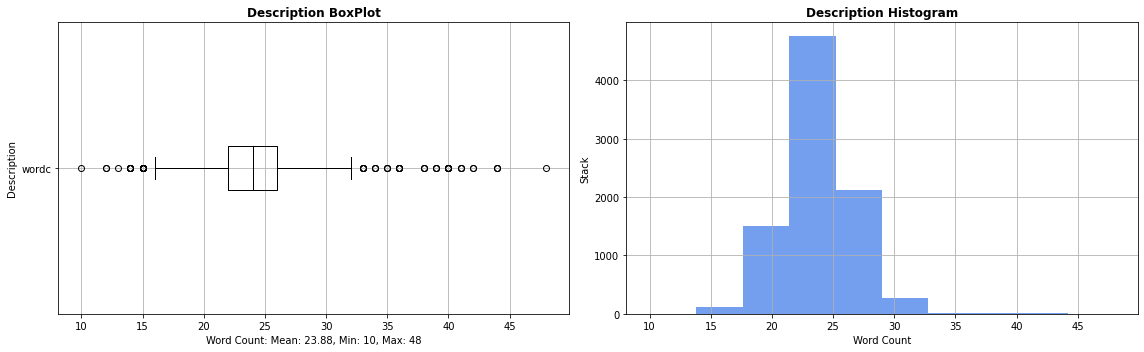

In [12]:
pluto.draw_word_count(pluto.df_netflix_data)

## Twitter

In [13]:
@add_method(PacktDataAug)
def fetch_df(self, csv):
  df = pandas.read_csv(csv, encoding='latin-1')
  return df

In [55]:
# 
%%time
#url = 'https://www.kaggle.com/datasets/datatattle/covid-19-nlp-text-classification'
url = 'https://www.kaggle.com/datasets/mayurdalvi/twitter-sentiments-analysis-nlp'
pluto.fetch_kaggle_dataset(url)

100%|██████████| 1.23M/1.23M [00:00<00:00, 111MB/s]


CPU times: user 82.7 ms, sys: 10.1 ms, total: 92.8 ms
Wall time: 617 ms


In [56]:
# remove white space in directory and filename
# run this until no error/output
f = 'kaggle/twitter-sentiments-analysis-nlp'
#!find {f} -name "* *" -type d | rename 's/ /_/g'
!find {f} -name "* *" -type f | rename 's/ /_/g'

In [57]:
f = 'kaggle/twitter-sentiments-analysis-nlp/Twitter_Sentiments.csv'
pluto.df_twitter_data = pluto.fetch_df(f)
pluto.df_twitter_data.head(3)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty


In [62]:
pluto.print_batch_text(pluto.df_twitter_data,cols=['label', 'tweet'])

,label,tweet
11271,1,"y'all, is global. we just may have to lose before folks understand."
31165,0,my mom and 3rd grandmother #mall #smile
20697,0,let's say it plain and simple: these are two #dogs.
22833,0,the latest japanfuninfo! thanks to @user @user @user #Ã§ÂÂ¹Ã¤ÂºÂ
19621,0,class of sept 2014 came to a fruitful end. #life
16843,0,40th bihday cake #labradors #holland #southafrica #uk #bihday #cake #baking
11904,0,@user @user but you never talk with me
9540,0,when the most exciting season so far in the league is going to end tomorrow.
21537,0,i figured out why lower income groups don't read as much as higher income groups: creditable #books cost more than rent! #economic
27838,0,"google censoring free speech! gateway pundit, pamela geller, who else has been censored and who's next?"


In [28]:
!pip install filter-profanity
import profanity

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 46 kB 2.5 MB/s 


In [75]:
# clean up
import re
#
@add_method(PacktDataAug)
def _clean_text(self,x):
  return (re.sub('[^A-Za-z0-9 .,!?#@]+', '', str(x)))
#
@add_method(PacktDataAug)
def _clean_bad_word(self,x):
  return (profanity.censor_profanity(x, ''))
#
@add_method(PacktDataAug)
def clean_text(self, df):
  df['clean_tweet'] = df.tweet.apply(self._clean_text)
  df['clean_tweet'] = df['clean_tweet'].apply(self._clean_bad_word)
  #df['clean_tweet'] = df.tweet.apply(self._clean_bad_word)
  return df

In [76]:
%%time
pluto.clean_text(pluto.df_twitter_data)
pluto.df_twitter_data.head()

CPU times: user 3.24 s, sys: 21 ms, total: 3.26 s
Wall time: 3.26 s


,id,label,tweet,clean_tweet,clean_tweet_2
0,1,0,@user when a father is dysfunctional and is s...,@user when a father is dysfunctional and is so...,@user when a father is dysfunctional and is so...
1,2,0,@user @user thanks for #lyft credit i can't us...,@user @user thanks for #lyft credit i cant use...,@user @user thanks for #lyft credit i cant use...
2,3,0,bihday your majesty,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ur!!!,#model i love u take with u all the time in ur!!!
4,5,0,factsguide: society now #motivation,factsguide society now #motivation,factsguide society now #motivation


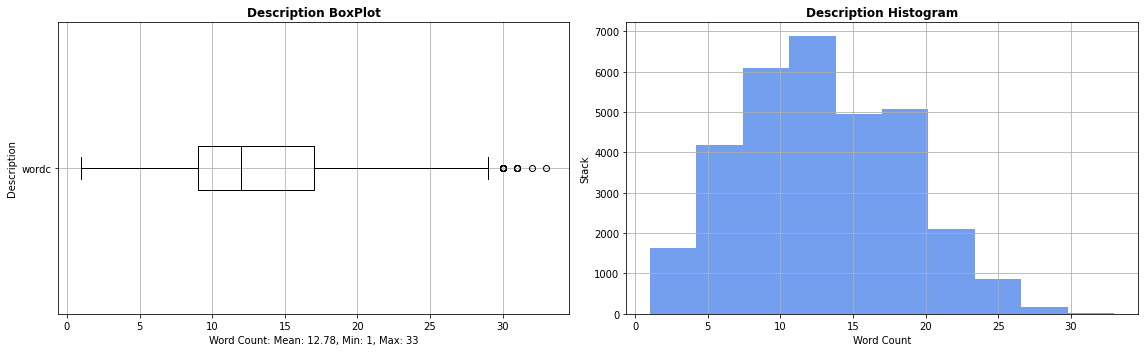

In [77]:
pluto.count_word(pluto.df_twitter_data,col_dest='clean_tweet')
pluto.draw_word_count(pluto.df_twitter_data)

In [23]:
# !pip install gensim==4.2.0

In [ ]:
# import os
# os.environ["MODEL_DIR"] = '../model'

In [ ]:
# import re
# text = '<seg><html>cat <b>in</b> <cat> <at>the</cat> hat</html></seg>'
# t = re.sub('<[^<]+?>', '', text)
# print(t)

# Character Augmenter<a class="anchor" id="chara_aug">

Augmenting data in character level. Possible scenarios include image to text and chatbot. During recognizing text from image, we need to optical character recognition (OCR) model to achieve it but OCR introduces some errors such as recognizing "o" and "0". `OCRAug` simulate these errors to perform the data augmentation. For chatbot, we still have typo even though most of application comes with word correction. Therefore, `KeyboardAug` is introduced to simulate this kind of errors.

In [78]:
!pip install nlpaug

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 410 kB 8.4 MB/s 


In [90]:
import nlpaug
import nlpaug.augmenter
import nlpaug.augmenter.char
import nlpaug.augmenter.word
print('version 1.1.11, actual: ',nlpaug.__version__)

version 1.1.11, actual:  1.1.11


In [91]:
pluto.orig_text = 'It was the best of times. It was the worst of times. It was the age of wisdom. It was the age of foolishness. It was the epoch of belief. It was the epoch of incredulity.'

In [92]:
# %%writefile -a {pluto_chapter_2}

@add_method(PacktDataAug)
def _print_aug_batch(self, df, aug_func, col_dest="description",bsize=3, aug_name='Augmented'):
  col_name = [aug_name, 'Original']
  aug = aug_func.augment(self.orig_text, n=1)
  data = [[aug[0], self.orig_text]]
  df_aug = pandas.DataFrame(data, columns=col_name)
  orig = df[col_dest].sample(bsize)
  for tx in orig:
    aug = aug_func.augment(tx, n=1)
    data = [[aug[0], tx]]
    t = pandas.DataFrame(data, columns=col_name)
    df_aug = df_aug.append(t, ignore_index=True)
  #
  with pandas.option_context("display.max_colwidth", None):
    display(df_aug.head(bsize+1))
  return

## OCR augmenting

In [93]:
# %%writefile -a {pluto_chapter_5}

@add_method(PacktDataAug)
def print_aug_ocr(self, df, col_dest="description",bsize=3, aug_name='Augmented'):
  aug_func = nlpaug.augmenter.char.OcrAug()
  self._print_aug_batch(df, aug_func,col_dest=col_dest,bsize=bsize, aug_name=aug_name)
  return

In [94]:
pluto.print_aug_ocr(pluto.df_netflix_data, col_dest='description',aug_name='OCR Augment')

,OCR Augment,Original
0,It was the best of time8. 1t was the wok8t 0f time8. It was the age of wisdom. It was the a9e of foolishness. It was the epoch of belief. 1t was the epoch of incredulity.,It was the best of times. It was the worst of times. It was the age of wisdom. It was the age of foolishness. It was the epoch of belief. It was the epoch of incredulity.
1,"This unfiltered documentary follows the kocry life and 8tkat08pheric career of A11en Iverson, an NEA icon who left an indelible makr 0n the sport.","This unfiltered documentary follows the rocky life and stratospheric career of Allen Iverson, an NBA icon who left an indelible mark on the sport."
2,Bvidence f0ond on the 6udy 0f a homicide victim 8park8 hope in a prosecutor that his sister who di8appeaked 25 years earlier could still be a1ive.,Evidence found on the body of a homicide victim sparks hope in a prosecutor that his sister who disappeared 25 years earlier could still be alive.
3,"On the shores of Cape Mekcy, a skillful group of teen divers inve8ti9ate a series uf secrets and si9n8 after one 0f theik own mysteriously goes missing.","On the shores of Cape Mercy, a skillful group of teen divers investigate a series of secrets and signs after one of their own mysteriously goes missing."


In [95]:
pluto.print_aug_ocr(pluto.df_twitter_data, col_dest='clean_tweet',aug_name='OCR Augment')

,OCR Augment,Original
0,It was the best of times. It wa8 the wok8t of times. It was the age of wisdom. It was the age of foolishness. It was the epoch uf belief. It was the ep0ch of inckedo1ity.,It was the best of times. It was the worst of times. It was the age of wisdom. It was the age of foolishness. It was the epoch of belief. It was the epoch of incredulity.
1,it8 never tuu late to have a childhood. 6erre breathed,its never too late to have a childhood. berke breathed
2,series fina1e of house uf lies tuni9ht.,series finale of house of lies tonight.
3,8 user @ user @ u8ek n0thin9 has to be cukkected cuz nothings wrong. ps using after each p08t is pa88ive ag9re88ive,@user @user @user nothing has to be corrected cuz nothings wrong. ps using after each post is passive aggressive


### scratch

In [25]:
# import nlpaug.augmenter.char as nac
# import nlpaug.augmenter.word as naw
# import nlpaug.augmenter.sentence as nas
# import nlpaug.flow as nafc

# from nlpaug.util import Action

In [26]:
# #text = 'The quick brown fox jumps over the lazy dog .'
# text = 'It was the best of times. It was the worst of times. It was the age of wisdom. It was the age of foolishness. It was the epoch of belief. It was the epoch of incredulity.'
# print(text)

It was the best of times. It was the worst of times. It was the age of wisdom. It was the age of foolishness. It was the epoch of belief. It was the epoch of incredulity.


## Keyboard Augmenter<a class="anchor" id="keyboard_aug"></a>

##### Substitute character by keyboard distance

In [96]:
# %%writefile -a {pluto_chapter_5}

@add_method(PacktDataAug)
def print_aug_keyboard(self, df, col_dest="description",bsize=3, aug_name='Keyboard Augment'):
  aug_func = nlpaug.augmenter.char.KeyboardAug()
  self._print_aug_batch(df, aug_func,col_dest=col_dest,bsize=bsize, aug_name=aug_name)
  return

In [98]:
pluto.print_aug_keyboard(pluto.df_netflix_data, col_dest='description',aug_name='Keyboard Augment')

,Keyboard Augment,Original
0,"It was the vfst of t7mec. It was the worA^ of Fimws. It was the age of Qicdom. It was the age of fo)liEhneDq. It was the 40och of belisv. It was the epicj of OncE$du,ity.",It was the best of times. It was the worst of times. It was the age of wisdom. It was the age of foolishness. It was the epoch of belief. It was the epoch of incredulity.
1,"CKmiD Jim raffugab Seiive#s his sardonic ta.d on 6op&cs like eating, fxerDLse, weddings and his fiBr .iSs in this live stQnR - up special.","Comic Jim Gaffigan delivers his sardonic take on topics like eating, exercise, weddings and his five kids in this live stand-up special."
2,"Two exes run LnGo eaFu other at a wedding hall and realize they shil; harbor romantic fee,9ngX. The one 9rkblrm? Tb$y jJsH got married to othwf leoplF.",Two exes run into each other at a wedding hall and realize they still harbor romantic feelings. The one problem? They just got married to other people.
3,An unwss7mint San Francisco DGef g2comec the latest in a long .one of assasxJnz Xhoswn to keep the mystOcxP Wu poaDrs out of the wrong haJdD.,An unassuming San Francisco chef becomes the latest in a long line of assassins chosen to keep the mystical Wu powers out of the wrong hands.


In [99]:
pluto.print_aug_keyboard(pluto.df_twitter_data, col_dest='clean_tweet',aug_name='Keyboard Augment')

,Keyboard Augment,Original
0,It was the Fect of tiHea. It was the wo3et of tLjes. It was the age of wisVon. It was the age of foPl*shnexE. It was the FpocM of ge:ief. It was the WpocJ of incrfw6lihy.,It was the best of times. It was the worst of times. It was the age of wisdom. It was the age of foolishness. It was the epoch of belief. It was the epoch of incredulity.
1,Twve a nice day # hotday # beautUculweagNdr # o.dzchooI # sun # sukmerixFom*Bg # jltd # hogs,have a nice day #hotday #beautifulweather #oldschool #sun #summeriscoming #motd #hotd
2,i am 6haBkfu; for photlHrA(hs. # tbanldul # positive,i am thankful for photographs. #thankful #positive
3,@ user @ user @ user and yet ZoH$how wFrf st9/l f#oendD woGh this country.,@user @user @user and yet somehow were still friends with this country.


## Random Augmenter<a class="anchor" id="random_aug"></a>

##### Insert character randomly

In [100]:
# %%writefile -a {pluto_chapter_5}

@add_method(PacktDataAug)
def print_aug_char_random(self, df, action='insert', col_dest="description",bsize=3, aug_name='Augment'):
  aug_func = nlpaug.augmenter.char.RandomCharAug(action=action)
  self._print_aug_batch(df, aug_func,col_dest=col_dest,bsize=bsize, aug_name=aug_name)
  return

In [101]:
pluto.print_aug_char_random(pluto.df_netflix_data, action='insert', col_dest='description', aug_name='Random Insert Augment')

,Random Insert Augment,Original
0,It was the b6e8st of tdim2es. It was the BworPst of tiWmeTs. It was the age of Ewisdvom. It was the age of fo^olwisShnsess. It was the eWpBoch of beSlieuf. It was the ep_onch of iSncAredkuliety.,It was the best of times. It was the worst of times. It was the age of wisdom. It was the age of foolishness. It was the epoch of belief. It was the epoch of incredulity.
1,"When mBarbtie ’ s sister C)heHlAsea thinks her bAirthida3y has b+emen sLkzippebd, she huLnt&s for a magic gem on a jungllie island that will #granLt her @wisjh to get it babc7k.","When Barbie’s sister Chelsea thinks her birthday has been skipped, she hunts for a magic gem on a jungle island that will grant her wish to get it back."
2,"Plucky lizard Oscar spends his UtiEme t!ryindg to avopiYd the Bh7azarBds of the Bdgesert, i(n@clquding marauding chickens and bumbling adveresCarxives.","Plucky lizard Oscar spends his time trying to avoid the hazards of the desert, including marauding chickens and bumbling adversaries."
3,"A cop full of s0e$lf - dxoubbt Flo0ses his gun +fiTve days bef+oore he ' s due to leaqvse the RfoRrce, and bxeVcnomes an unexpected 3h9ero as he tjriles to retrieve it.","A cop full of self-doubt loses his gun five days before he's due to leave the force, and becomes an unexpected hero as he tries to retrieve it."


In [103]:
pluto.print_aug_char_random(pluto.df_netflix_data, action='delete', col_dest='description', aug_name='Random Delete Augment')

,Random Delete Augment,Original
0,It was the st of ies. It was the wot of mes. It was the age of wsom. It was the age of ooshnes. It was the eph of blie. It was the och of nrdulty.,It was the best of times. It was the worst of times. It was the age of wisdom. It was the age of foolishness. It was the epoch of belief. It was the epoch of incredulity.
1,"Elmo hops across the pond to el his xtndd monster faly solve problems at thi "" lost "" wrd - cla establishment, the Furceer Hte.","Elmo hops across the pond to help his extended monster family solve problems at their ""almost"" world-class establishment, the Furchester Hotel."
2,"As a flesh - etng virus rips its way thro a rmot odlan ain, the terrfd tee vacationing inside wonder who ' ll fall vctm ex.","As a flesh-eating virus rips its way through a remote woodland cabin, the terrified teens vacationing inside wonder who'll fall victim next."
3,A ep dive into the work of renowned xcan journalist Mnue Buendía lks to unravel his mrer and the ties been olics and drug taicing.,A deep dive into the work of renowned Mexican journalist Manuel Buendía looks to unravel his murder and the ties between politics and drug trafficking.


In [113]:
pluto.print_aug_char_random(pluto.df_netflix_data, action='substitute', col_dest='description', aug_name='Random Substitute Augment')

,Random Substitute Augment,Original
0,It was the bf+t of tiJVs. It was the &ors^ of fimeR. It was the age of Gisdof. It was the age of +Qoj7shness. It was the 6pocq of belozf. It was the epok0 of increEaliYO.,It was the best of times. It was the worst of times. It was the age of wisdom. It was the age of foolishness. It was the epoch of belief. It was the epoch of incredulity.
1,C+rf has three sFfs and a daugnt)n and she ´ s ajmo&t 80. One day d#Sing a *a5ily mewnio_ the big qqsslion Fo)es up: who will be her )e*r?,Cora has three sons and a daughter and she´s almost 80. One day during a family reunion the big question comes up: who will be her heir?
2,A haco riyeM to save a world that ' s also a Gpacesniz under HiegX by an alien thrJht in &hi5 Ari_inOl a9lme series based on the popular ean^a coni8.,A hero rises to save a world that's also a spaceship under siege by an alien threat in this original anime series based on the popular manga comic.
3,Ramen chef Masato KrLvel( to SinFaMo@e to Jetu&ce his morh$r ' s l1f8 and fWndg a deeoed undehstanqiHh of his family history and culture.,Ramen chef Masato travels to Singapore to retrace his mother's life and finds a deeper understanding of his family history and culture.


In [109]:
pluto.print_aug_char_random(pluto.df_netflix_data, action='swap', col_dest='description', aug_name='Random Swap Augment')

,Random Swap Augment,Original
0,It was the ebts of tiesm. It was the wrsot of times. It was the age of iwdsom. It was the age of ofolieshnss. It was the peohc of bleife. It was the eophc of increudilty.,It was the best of times. It was the worst of times. It was the age of wisdom. It was the age of foolishness. It was the epoch of belief. It was the epoch of incredulity.
1,"This ianmtaed series follsow young Omwlgi and his animal mentors Bagheera and Alboo, who do their ebts to protect him rofm feicre tiger Shere Khan.","This animated series follows young Mowgli and his animal mentors Bagheera and Baloo, who do their best to protect him from fierce tiger Shere Khan."
2,"Eudadr, a husband and father who loses his family in a tracgi accident, travels to paarllle universes to eesk a beettr ftea for his bevlode wfei.","Eduard, a husband and father who loses his family in a tragic accident, travels to parallel universes to seek a better fate for his beloved wife."
3,"After 15 eyasr bheidn brsa, a kniedahrted ex - drug dealer erturns to Brooklyn looking for a rfehs tsatr, noyl to discover things have achngde. A lot.","After 15 years behind bars, a kindhearted ex-drug dealer returns to Brooklyn looking for a fresh start, only to discover things have changed. A lot."


In [107]:
pluto.print_aug_char_random(pluto.df_twitter_data, action='insert', col_dest='clean_tweet', aug_name='Random Insert Augment')

,Random Insert Augment,Original
0,It was the bees&t of ct7imes. It was the woBrspt of tHimJes. It was the age of wisd$olm. It was the age of fool(isGhn#esis. It was the epfo2ch of bDelxief. It was the ep4o#ch of inmc1repdu!lity.,It was the best of times. It was the worst of times. It was the age of wisdom. It was the age of foolishness. It was the epoch of belief. It was the epoch of incredulity.
1,the &mUost dangerto_u0s thing in democracy is we chyoLose leader 4wCith trust and Xthetn they 5forem a gbovat which never fo2llo%w the democracy at all,the most dangerous thing in democracy is we choose leader with trust and then they form a govt which never follow the democracy at all
2,my hea is Owit5h # orlando right now. i truXlEy @cQannot imagine. coutl@d kha%ve easily h%a@ppen+ed anywhere.,my hea is with #orlando right now. i truly cannot imagine. could have easily happened anywhere.
3,fVeeols l8irke @ user has been payAi6ng # teenchoicesostraight # cleSx@a,feels like @user has been paying #teenchoicesostraight #clexa


In [108]:
pluto.print_aug_char_random(pluto.df_twitter_data, action='delete', col_dest='clean_tweet', aug_name='Random Delete Augment')

,Random Delete Augment,Original
0,It was the es of ies. It was the wrt of tie. It was the age of wism. It was the age of oolises. It was the ech of elie. It was the och of iredlty.,It was the best of times. It was the worst of times. It was the age of wisdom. It was the age of foolishness. It was the epoch of belief. It was the epoch of incredulity.
1,4 # hiteopl? all 2 cou. no mei overa. or wp we ctis and feared for eir lie. aye poatin. # ckprson. who? ??,4 #whitepeople? all 2 cou. no media coverage. or wp were victims and feared for their lives. maybe probation. #blackperson. who???
2,# jeffsion # tneygenral om # lbma # rup staing a # racewar il we let him? # aos # fear # eaory @ user,#jeffsessions #attorneygeneral from #alabama #trump staing a #racewar will we let him? #chaos #fear #weaponry @user
3,"et ar hold be a beee, huh? lol # mahepd # lotsofsrsscongup! !!!","next year should be a breeze, huh? lol #mashpeepd #lotsofsurprisescomingup! !!!"


In [112]:
pluto.print_aug_char_random(pluto.df_twitter_data, action='substitute', col_dest='clean_tweet', aug_name='Random Substitute Augment')

,Random Substitute Augment,Original
0,It was the bOsT of tqmzs. It was the woGgt of pimek. It was the age of 5lsdom. It was the age of foS8ishnegD. It was the e%o6h of btlgef. It was the eZocy of ibcrHdutiEy.,It was the best of times. It was the worst of times. It was the age of wisdom. It was the age of foolishness. It was the epoch of belief. It was the epoch of incredulity.
1,@ uee+ root seek in a storm # josPbeer # stox$ # Ma4n # # tq3ndmr # lPghTniig # car # caf#inK # ford,@user root beer in a storm #rootbeer #storm #rain # #thunder #lightning #car #caffine #ford
2,"vew! wicq the # k5rv!ce and the # pr0He # paryiSg in # thestrand, # soVwnKgarden, # wc2","very with the #service and the #price #parking in #thestrand, #coventgarden, #wc2"
3,the pGOfOct lunch frthKRs day thebeaumont # cQlonnRcill,the prefect lunch fathers day thebeaumont #colonygrill


In [114]:
pluto.print_aug_char_random(pluto.df_twitter_data, action='swap', col_dest='clean_tweet', aug_name='Random Swap Augment')

,Random Swap Augment,Original
0,It was the btes of tisme. It was the owrts of imtes. It was the age of iwsdmo. It was the age of foolishnses. It was the poech of beelif. It was the ecpoh of incredultyi.,It was the best of times. It was the worst of times. It was the age of wisdom. It was the age of foolishness. It was the epoch of belief. It was the epoch of incredulity.
1,# 2016highlights # samwu fights aagistn in various nmiucpilaities such as in nbaomospriut area,#2016highlights #samwu fights against in various municipalities such as in naboomspruit area
2,# raw food idte benefist! # altwyastoelha # healthy # haelgin # epaec # joy # love!!,#raw food diet benefits! #altwaystoheal #healthy #healing #peace #joy #love !!
3,@ sure on the way to the phapy ahes ufndriasre! ! # spuop # chrayit # hea,@user on the way to the happy heas fundraiser!! #suppo #charity #hea


# Word Augmenter<a class="anchor" id="word_aug"></a>

Besides character augmentation, word level is important as well. We make use of word2vec (Mikolov et al., 2013), GloVe (Pennington et al., 2014), fasttext (Joulin et al., 2016), BERT(Devlin et al., 2018) and wordnet to insert and substitute similar word. `Word2vecAug`,  `GloVeAug` and `FasttextAug` use word embeddings to find most similar group of words to replace original word. On the other hand, `BertAug` use language models to predict possible target word. `WordNetAug` use statistics way to find the similar group of words.

### Spelling Augmenter<a class="anchor" id="spelling_aug"></a>

##### Substitute word by spelling mistake words dictionary

In [116]:
# %%writefile -a {pluto_chapter_5}

@add_method(PacktDataAug)
def print_aug_word_spelling(self, df, col_dest="description",bsize=3, aug_name='Augment'):
  aug_func = nlpaug.augmenter.word.SpellingAug()
  self._print_aug_batch(df, aug_func,col_dest=col_dest,bsize=bsize, aug_name=aug_name)
  return

In [117]:
pluto.print_aug_word_spelling(pluto.df_netflix_data, col_dest='description', aug_name='Word Spelling Augment')

,Word Spelling Augment,Original
0,It was then bets oh times. /It was hte worsest of time. It was the age of wisdom. It was the age OK foolishness. It was the epoch of belief. It''s was the epoch f incredulity.,It was the best of times. It was the worst of times. It was the age of wisdom. It was the age of foolishness. It was the epoch of belief. It was the epoch of incredulity.
1,A pizza delivey boy who doesn ' t beliave in teh supernatural ske forced to confront his convictions aftery being trape ne am house on his rout.,A pizza delivery boy who doesn't believe in the supernatural is forced to confront his convictions after being trapped in a house on his route.
2,"At renown muzik techear mentors a promising young singer, but when here fame begins to overshadow his on, he'll Let's jealousy and competition take overt.","A renowned music teacher mentors a promising young singer, but when her fame begins to overshadow his own, he lets jealousy and competition take over."
3,"A jornalist latches onto an unbelivable story hs Iraque when he mets Lyn, a wan of mysteric origins who reveals he sas de "" warrior monk. ""","A journalist latches onto an unbelievable story in Iraq when he meets Lyn, a man of mysterious origins who reveals he was a ""warrior monk."""


In [118]:
pluto.print_aug_word_spelling(pluto.df_twitter_data, col_dest='clean_tweet', aug_name='Word Spelling Augment')

,Word Spelling Augment,Original
0,It was thet best of teams. It was thez worst of times. It was tehe age of wisdom. Its wat ths age of foolishness. Hit was thye epoch af belief. It was the epoch of incredulity.,It was the best of times. It was the worst of times. It was the age of wisdom. It was the age of foolishness. It was the epoch of belief. It was the epoch of incredulity.
1,i am thanksfull fo sunshine. # thankul # positive,i am thankful for sunshine. #thankful #positive
2,whev your bffs bday pres 1s sitting i tour room amp yours just want to send it butt thier bday isn't till next month @ user,when your bffs bday pres is sitting in your room amp you just want to send it but their bday isnt till next month @user
3,@ user & nwo weve geo @ user # fangirling @ user,@user and now weve got @user #fangirling @user


### Split Augmenter<a class="anchor" id="split_aug"></a>

##### Split word to two tokens randomly

In [120]:
# %%writefile -a {pluto_chapter_5}

@add_method(PacktDataAug)
def print_aug_word_split(self, df, col_dest="description",bsize=3, aug_name='Augment'):
  aug_func = nlpaug.augmenter.word.SplitAug()
  self._print_aug_batch(df, aug_func,col_dest=col_dest,bsize=bsize, aug_name=aug_name)
  return

In [121]:
pluto.print_aug_word_split(pluto.df_netflix_data, col_dest='description', aug_name='Word Split Augment')

,Word Split Augment,Original
0,It was the b est of ti mes. It was the wor st of tim es. It was the age of w isdom. It was the age of foolis hness. It was the epo ch of be lief. It was the epo ch of increduli ty.,It was the best of times. It was the worst of times. It was the age of wisdom. It was the age of foolishness. It was the epoch of belief. It was the epoch of incredulity.
1,"Plucky lizard Oscar spends his ti me tryi ng to avoid the ha zards of the de sert, i ncluding marauding chicke ns and bumbling adversari es.","Plucky lizard Oscar spends his time trying to avoid the hazards of the desert, including marauding chickens and bumbling adversaries."
2,"In this Spani sh adaptati on of "" Ma gic for Humans, "" f olks of all a ges on the st reets of Barcelona are amaz ed by tric ks that i nspire delight and wonder.","In this Spanish adaptation of ""Magic for Humans,"" folks of all ages on the streets of Barcelona are amazed by tricks that inspire delight and wonder."
3,A sing le mom and skill ed chef y earns for her c hildren to settle down and offers th em life lessons through the s pecial dish es she c reates.,A single mom and skilled chef yearns for her children to settle down and offers them life lessons through the special dishes she creates.


In [122]:
pluto.print_aug_word_split(pluto.df_twitter_data, col_dest='clean_tweet', aug_name='Word Split Augment')

,Word Split Augment,Original
0,It was the be st of ti mes. It was the wor st of tim es. It was the age of w isdom. It was the age of foolishne ss. It was the ep och of beli ef. It was the e poch of increduli ty.,It was the best of times. It was the worst of times. It was the age of wisdom. It was the age of foolishness. It was the epoch of belief. It was the epoch of incredulity.
1,ag ain irrational r age under control,again irrational rage under control
2,@ user @ us er @ u ser @ user strai ght white men are viciously under a ttack. they are of ten the r eal vict ims.,@user @user @user @user straight white men are viciously under attack. they are often the real victims.
3,@ u ser got the girls o ver # t ittytuesday! . @ user @ us er @ u ser @ user @ us er,@user got the girls over #tittytuesday! .@user @user @user @user @user


### Random Word Augmenter<a class="anchor" id="random_word_aug"></a>

In [125]:
# %%writefile -a {pluto_chapter_5}

@add_method(PacktDataAug)
def print_aug_word_random(self, df, action='swap', col_dest="description",bsize=3, aug_name='Augment'):
  aug_func = nlpaug.augmenter.word.RandomWordAug(action=action)
  self._print_aug_batch(df, aug_func,col_dest=col_dest,bsize=bsize, aug_name=aug_name)
  return

In [126]:
pluto.print_aug_word_random(pluto.df_netflix_data, action='swap', col_dest='description', aug_name='Word Random Swap Augment')

,Word Random Swap Augment,Original
0,It the was times best of. It the was worst of times It. the was age wisdom of. It was the age of foolishness. It epoch was the of belief. It was the of epoch incredulity.,It was the best of times. It was the worst of times. It was the age of wisdom. It was the age of foolishness. It was the epoch of belief. It was the epoch of incredulity.
1,"When on a teen the autism spectrum decides to get a, girlfriend his for bid independence more puts his whole family on a path - of self discovery.","When a teen on the autism spectrum decides to get a girlfriend, his bid for more independence puts his whole family on a path of self-discovery."
2,"Due various to personal, reasons a group of Tae Yun o - ’ friends s move his into house, experience where they love, friendship, and between everything in.","Due to various personal reasons, a group of Yun Tae-o’s friends move into his house, where they experience love, friendship, and everything in between."
3,"The as and lives of rich poor passengers aboard a steamship unfold, secrets buried, lustful affairs and selfish are desires exposed.","As the lives of rich and poor passengers aboard a steamship unfold, buried secrets, lustful affairs and selfish desires are exposed."


In [127]:
pluto.print_aug_word_random(pluto.df_netflix_data, action='substitute', col_dest='description', aug_name='Word Random Substitude Augment')

,Word Random Substitude Augment,Original
0,It was the best _ times. It was _ worst of _. It was _ _ _ wisdom. _ was _ age of foolishness. _ was the epoch of belief. It _ the epoch of incredulity.,It was the best of times. It was the worst of times. It was the age of wisdom. It was the age of foolishness. It was the epoch of belief. It was the epoch of incredulity.
1,"With help from a 102 - _ - _ goblin _ beneath their haunted _ building, _ _ deal with _ and take on _ _.","With help from a 102-year-old goblin dwelling beneath their haunted apartment building, two siblings deal with ghosts and take on spooky mysteries."
2,The de _ Mora _ publicly mourn the _ of their _ amid multiple _ and mishaps _ Virginia ' _ funeral.,The de la Mora siblings publicly mourn the death of their mother amid multiple surprises and mishaps at Virginia's funeral.
3,"To assert her independence _ her rigid father ’ _ expectations, a headstrong woman hires _ desperate _ _ man to _ as _ _ _ Africa.","To assert her independence from her rigid father’s expectations, a headstrong woman hires a desperate Los Angeles man to pose as her fiancé in Africa."


In [128]:
pluto.print_aug_word_random(pluto.df_netflix_data, action='crop', col_dest='description', aug_name='Word Random Crop Augment')

,Word Random Crop Augment,Original
0,It was the best of times. It was the worst of times. It was the age of wisdom. It was the age of foolishness. epoch of incredulity.,It was the best of times. It was the worst of times. It was the age of wisdom. It was the age of foolishness. It was the epoch of belief. It was the epoch of incredulity.
1,A quo in 1960s Mississippi by interviewing Black housemaids and bringing their stories to the masses.,"A young, white writer stirs up the status quo in 1960s Mississippi by interviewing Black housemaids and bringing their stories to the masses."
2,This documentary team of four women who rowed from San Francisco to Australia in support of two charities.,"This documentary recounts the feats of the Coxless Crew, a team of four women who rowed from San Francisco to Australia in support of two charities."
3,", wage a battle for supremacy in this fantasy tale based on the hit video games and the "" Romance of the","Warlords, warriors and statesmen wage a battle for supremacy in this fantasy tale based on the hit video games and the ""Romance of the Three Kingdoms."""


In [129]:
pluto.print_aug_word_random(pluto.df_netflix_data, action='delete', col_dest='description', aug_name='Word Random Delete Augment')

,Word Random Delete Augment,Original
0,Was best of times. It was the worst of times. It was age of wisdom. It was the age of. It epoch of. It was epoch of.,It was the best of times. It was the worst of times. It was the age of wisdom. It was the age of foolishness. It was the epoch of belief. It was the epoch of incredulity.
1,"Eight feisty young drifter. When politician Fatka ' s way of life, the band in honor their pal.","Eight feisty boys befriend young drifter Fatka. When a mean politician threatens Fatka's way of life, the boys band together in honor of their pal."
2,"Astronomers reveal discoveries about death - trap planets, asteroids, and other the.","Leading astronomers reveal the latest discoveries about death-trap planets, asteroids, comets and other wonders of the cosmos."
3,"At the onset of World War, Polish infantry firepower fight to build defense and enemy forces.","At the onset of World War II, a Polish infantry lacking firepower fight to build a strong defense and protect their peninsula against enemy forces."


In [130]:
pluto.print_aug_word_random(pluto.df_twitter_data, action='swap', col_dest='clean_tweet', aug_name='Word Random Swap Augment')

,Word Random Swap Augment,Original
0,Was it the of best times. It the was worst of times. It was the age of wisdom. It was age the foolishness of. was the It epoch belief of was. It the epoch of incredulity.,It was the best of times. It was the worst of times. It was the age of wisdom. It was the age of foolishness. It was the epoch of belief. It was the epoch of incredulity.
1,Model i # u love take with u all the in time! ur!!,#model i love u take with u all the time in ur!!!
2,@ user things coming are nicely! along # columbus # # mbb # mygrind mrbaileybaby tshi #,@user things are coming along nicely ! #columbus #mbb #mygrind #mrbaileybaby #tshi
3,getting to ready swing into the sixties with tonight @ # sewingbee user,getting ready to swing into the sixties tonight with @user #sewingbee


In [131]:
pluto.print_aug_word_random(pluto.df_twitter_data, action='substitute', col_dest='clean_tweet', aug_name='Word Random Substitute Augment')

,Word Random Substitute Augment,Original
0,_ was the best of _. _ was _ worst of _. _ was the age of wisdom. It was the age _ _. It was _ epoch of _. It was the epoch of incredulity.,It was the best of times. It was the worst of times. It was the age of wisdom. It was the age of foolishness. It was the epoch of belief. It was the epoch of incredulity.
1,_ on what you _ _ _ be doing will allow _ to stay and # _,focusing on what you truly want to be doing will allow you to stay and #healthy
2,this _ _ _ # curbyourenthusiasm i _ # larrydavid # hbo,this makes me so #curbyourenthusiasm i lt3 #larrydavid #hbo
3,# _ where _ _ are. ..,#bigday where ever you are...


In [132]:
pluto.print_aug_word_random(pluto.df_twitter_data, action='crop', col_dest='clean_tweet', aug_name='Word Random Crop Augment')

,Word Random Crop Augment,Original
0,Was was the worst of times. It was the age of wisdom. It was the age of foolishness. It was the epoch of belief. It was the epoch of,It was the best of times. It was the worst of times. It was the age of wisdom. It was the age of foolishness. It was the epoch of belief. It was the epoch of incredulity.
1,@ user i hate that head # purrs,@user i hate that plastic thing around my head #purrs
2,user be doing our best to work to front of stage tomorrow in nashville!!,@user my daughter and myself will be doing our best to work to front of stage tomorrow in nashville!!
3,"# bestoftheday polar bear climb racing angry polar bear climb racing, places","#bestoftheday polar bear climb racing angry polar bear climb racing, the polar bear living in cold places"


In [133]:
pluto.print_aug_word_random(pluto.df_twitter_data, action='delete', col_dest='clean_tweet', aug_name='Word Random Delete Augment')

,Word Random Delete Augment,Original
0,Was the best of. It was the of. It was the age of wisdom. It of foolishness. It was the of. It was the of incredulity.,It was the best of times. It was the worst of times. It was the age of wisdom. It was the age of foolishness. It was the epoch of belief. It was the epoch of incredulity.
1,forwards a @ user extension tomorrow @ user # huddersfield,looking forwards to a sneaky peek @user new extension tomorrow @user #huddersfield
2,!! !! sooo happy. you # clubtuas # 1k # followers # #,1k!!!! we are sooo happy. thank you all #clubtuas #1k #followers #amazing #thankyou
3,# # diy #,#birds #diy #crafts please


### Synonym Augmenter<a class="anchor" id="synonym_aug"></a>

In [134]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [135]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

##### Substitute word by WordNet's synonym

In [136]:
# %%writefile -a {pluto_chapter_5}

@add_method(PacktDataAug)
def print_aug_word_synonym(self, df, col_dest="description",bsize=3, aug_name='Augment'):
  aug_func = nlpaug.augmenter.word.SynonymAug(aug_src='wordnet')
  self._print_aug_batch(df, aug_func,col_dest=col_dest,bsize=bsize, aug_name=aug_name)
  return

In [137]:
pluto.print_aug_word_synonym(pluto.df_netflix_data, col_dest='description', aug_name='Synonym WordNet Augment')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


,Synonym WordNet Augment,Original
0,It was the unspoilt of time. It was the worst of times. It personify the eld of wisdom. It was the age of folly. It was the era of impression. Information technology personify the date of reference of incredulity.,It was the best of times. It was the worst of times. It was the age of wisdom. It was the age of foolishness. It was the epoch of belief. It was the epoch of incredulity.
1,"As arguing hem in the evangelistic church he helped incur, Edir Macedo must juggle treason, politics and personal loss in this biopic sequel.","As controversy surrounds the evangelical church he helped found, Edir Macedo must juggle betrayals, politics and personal loss in this biopic sequel."
2,Argentine actor and comedian Fernando Sanjiao uses humor and impersonations to research the concepts of masculinity and father god in forward looking times.,Argentine actor and comedian Fernando Sanjiao uses humor and impersonations to explore the concepts of masculinity and fatherhood in modern times.
3,"Hand - picked by Tiffany Haddish, six spot diverse comedians showcase their in the altogether humor in a series of specials ooze with energy.","Hand-picked by Tiffany Haddish, six diverse comedians showcase their raw humor in a series of specials oozing with energy."


In [139]:
pluto.print_aug_word_synonym(pluto.df_twitter_data, col_dest='clean_tweet', aug_name='Synonym WordNet Augment')

,Synonym WordNet Augment,Original
0,It comprise the best of times. Information technology was the spoilt of times. It be the geezerhood of wisdom. It was the age of foolishness. It be the epoch of belief. Information technology equal the epoch of incredulity.,It was the best of times. It was the worst of times. It was the age of wisdom. It was the age of foolishness. It was the epoch of belief. It was the epoch of incredulity.
1,he knows maine yall! this is wherefore trump shouldnt win. to pipe up push down whatsoever ego boost everyone is get extinct of it,he knows me yall! this is why trump shouldnt win. to pipe down whatever ego boost everyone is getting out of it
2,finding walleye in less than two hrs.,finding dory in less than 2 hrs.
3,rest in repose # christinagrimmie # release # rip # missed # rooter # foreverinourheas,rest in peace #christinagrimmie #loss #rip #missed #fan #foreverinourheas


##### Substitute word by PPDB's synonym

In [ ]:
# nltk.download('ppdb-2.0-s-all')

In [ ]:
# aug = naw.SynonymAug(aug_src='ppdb', model_path='ppdb-2.0-s-all')
# augmented_text = aug.augment(text)
# print("Original:")
# print(text)
# print("Augmented Text:")
# print(augmented_text)

### Antonym Augmenter<a class="anchor" id="antonym_aug"></a>

In [140]:
# %%writefile -a {pluto_chapter_5}

@add_method(PacktDataAug)
def print_aug_word_antonym(self, df, col_dest="description",bsize=3, aug_name='Augment'):
  aug_func = nlpaug.augmenter.word.AntonymAug()
  self._print_aug_batch(df, aug_func,col_dest=col_dest,bsize=bsize, aug_name=aug_name)
  return

In [144]:
pluto.print_aug_word_antonym(pluto.df_netflix_data, col_dest='description',aug_name='Antonym Augment')

,Antonym Augment,Original
0,It differ the evil of times. It differ the unregretful of times. It differ the age of wisdom. It differ the age of foolishness. It differ the epoch of belief. It differ the epoch of incredulity.,It was the best of times. It was the worst of times. It was the age of wisdom. It was the age of foolishness. It was the epoch of belief. It was the epoch of incredulity.
1,"Five bad friends back adventures side by side in their hometown. Zany antics, love and missteps differ badly with friends!","Five best friends face adventures side by side in their hometown. Zany antics, love and missteps are better with friends!"
2,"Star - uncross lovers from same unsocial strata struggle to overcome differences in class and family expectation, as ill as a short separation.","Star-crossed lovers from different social strata struggle to overcome differences in class and family expectation, as well as a long separation."
3,"In 1980s Tokyo, an enigmatic expat differ trust of killing her friend, who ' s stop attend to in the wake of their love triangle with a general photographer.","In 1980s Tokyo, an enigmatic expat is suspected of killing her friend, who's gone missing in the wake of their love triangle with a local photographer."


In [150]:
pluto.print_aug_word_antonym(pluto.df_twitter_data, col_dest='clean_tweet',aug_name='Antonym Augment')

,Antonym Augment,Original
0,It differ the bad of times. It differ the unregretful of times. It differ the age of wisdom. It differ the age of foolishness. It differ the epoch of belief. It differ the epoch of incredulity.,It was the best of times. It was the worst of times. It was the age of wisdom. It was the age of foolishness. It was the epoch of belief. It was the epoch of incredulity.
1,"our two unpresidential candidates, everybody. this differ what weve recuperate into. # elections2016 # america # smh # usa","our two presidential candidates, everybody. this is what weve devolved into. #elections2016 #america #smh #usa"
2,i differ wohy. # iam # negative # affirmation,i am wohy. #iam #positive #affirmation
3,"@ user dear media, when someone differ born there, they differ what you call australians even when they unmake shitty things. # whitepriv","@user dear media, when someone is born here, they are what you call australians even when they do shitty things. #whitepriv"


### Reserved Word Augmenter<a class="anchor" id="reserved_aug"></a>

In [ ]:
import nlpaug.augmenter.word as naw

text = 'Fwd: Mail for solution'
reserved_tokens = [
    ['FW', 'Fwd', 'F/W', 'Forward'],
]
reserved_aug = naw.ReservedAug(reserved_tokens=reserved_tokens)
augmented_text = reserved_aug.augment(text)

print("Original:")
print(text)
print("Augmented Text:")
print(augmented_text)

Original:
Fwd: Mail for solution
Augmented Text:
['Forward: Mail for solution']


### Word Embeddings Augmenter<a class="anchor" id="word_embs_aug"></a> (advanced)

##### Insert word randomly by word embeddings similarity

In [ ]:
# !ls -la ../model/

In [ ]:
from nlpaug.util.file.download import DownloadUtil

DownloadUtil.download_word2vec(dest_dir='.') # word2vec
DownloadUtil.download_glove(model_name='glove.6B', dest_dir='.') # GloVe
DownloadUtil.download_fasttext(model_name='wiki-news-300d-1M', dest_dir='.') # fasttext model

#
# import nltk
# nltk.download('averaged_perceptron_tagger')
# nltk.download('wordnet')
# nltk.download('punkt')

Downloading...
From: https://drive.google.com/uc?export=download&id=0B7XkCwpI5KDYNlNUTTlSS21pQmM
To: /content/GoogleNews-vectors-negative300.bin.gz
100%|██████████| 1.65G/1.65G [00:09<00:00, 175MB/s]
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# Path of the model
gn_vec_path = "GoogleNews-vectors-negative300.bin"
#
# Word Augmenter
import nlpaug.augmenter.word as naw

In [ ]:
# Spelling
aug = naw.SpellingAug()
augmented_text = aug.augment(text)
print("original: ")
print(text)
print("augmented:")
print(augmented_text)

original: 
It was the best of times. It was the worst of times. It was the age of wisdom. It was the age of foolishness. It was the epoch of belief. It was the epoch of incredulity.
augmented:
["It was thw best iof times. It was the worst os timens. I'ts was the age fot wisdoms. It was the eage of foolishness. It was the epoch of believe. It wa the epoch of incredulity."]


In [ ]:
# Word embedding
aug = naw.WordEmbsAug(model_type='word2vec', action="insert", model_path=gn_vec_path)
augmented_text = aug.augment(text)
print("original: ")
print(text)
print("augmented:")
print(augmented_text)

original: 
It was the best of times. It was the worst of times. It was the age of wisdom. It was the age of foolishness. It was the epoch of belief. It was the epoch of incredulity.
augmented:
['inorganics It MYP was the best of times. It was the sas worst of times. It was the Society age Ituango of wisdom. It Langley was the age Arjowiggins of foolishness. It was the epoch of belief. It was the Physician epoch HOPES of Moskowy incredulity.']


In [ ]:
import gensim
print(gensim.__version__)

4.2.0


In [ ]:
!pip install gensim==4.2.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 24.1 MB 1.5 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [ ]:
model_dir = './'

In [ ]:
# model_type: word2vec, glove or fasttext
aug = naw.WordEmbsAug(
    model_type='word2vec', model_path=model_dir+'GoogleNews-vectors-negative300.bin',
    action="insert")
augmented_text = aug.augment(text)
print("Original:")
print(text)
print("Augmented Text:")
print(augmented_text)

Original:
It was the best of times. It was the worst of times. It was the age of wisdom. It was the age of foolishness. It was the epoch of belief. It was the epoch of incredulity.
Augmented Text:
['It was the best of times. It www.sedar.com was minister the worst Sunil of times. Adam It was www.desertstar.biz the age of wisdom. It was the age of foolishness. Volunteer It was CodeSonar the epoch of TEFAF belief. It was superpatriots the epoch SBIG of incredulity.']


##### Substitute word by word2vec similarity

In [ ]:
# model_type: word2vec, glove or fasttext
aug = naw.WordEmbsAug(
    model_type='word2vec', model_path=model_dir+'GoogleNews-vectors-negative300.bin',
    action="substitute")
augmented_text = aug.augment(text)
print("Original:")
print(text)
print("Augmented Text:")
print(augmented_text)

Original:
The quick brown fox jumps over the lazy dog
Augmented Text:
The easy brown fox jumps around the lazy dog


### TF-IDF Augmenter<a class="anchor" id="tfidf_aug"></a> (advanced)

##### Insert word by TF-IDF similarity

In [ ]:
aug = naw.TfIdfAug(
    model_path=os.environ.get("MODEL_DIR"),
    action="insert")
augmented_text = aug.augment(text)
print("Original:")
print(text)
print("Augmented Text:")
print(augmented_text)

FileNotFoundError: ignored

##### Substitute word by TF-IDF similarity

In [ ]:
aug = naw.TfIdfAug(
    model_path=os.environ.get("MODEL_DIR"),
    action="substitute")
augmented_text = aug.augment(text)
print("Original:")
print(text)
print("Augmented Text:")
print(augmented_text)

Original:
The quick brown fox jumps over the lazy dog
Augmented Text:
The quick brown fox Baked over the polygraphy dog


### Contextual Word Embeddings Augmenter<a class="anchor" id="context_word_embs_aug"></a> (advanced)

##### Insert word by contextual word embeddings (BERT, DistilBERT, RoBERTA or XLNet)

In [ ]:
aug = naw.ContextualWordEmbsAug(
    model_path='bert-base-uncased', action="insert")
augmented_text = aug.augment(text)
print("Original:")
print(text)
print("Augmented Text:")
print(augmented_text)

ModuleNotFoundError: ignored

##### Substitute word by contextual word embeddings (BERT, DistilBERT, RoBERTA or XLNet)

In [ ]:
aug = naw.ContextualWordEmbsAug(
    model_path='bert-base-uncased', action="substitute")
augmented_text = aug.augment(text)
print("Original:")
print(text)
print("Augmented Text:")
print(augmented_text)

Original:
The quick brown fox jumps over the lazy dog
Augmented Text:
little quick brown fox jumps over the lazy dog


In [ ]:
aug = naw.ContextualWordEmbsAug(
    model_path='distilbert-base-uncased', action="substitute")
augmented_text = aug.augment(text)
print("Original:")
print(text)
print("Augmented Text:")
print(augmented_text)

Original:
The quick brown fox jumps over the lazy dog .
Augmented Text:
the striped brown fox jumps over the muddy grass .


In [ ]:
aug = naw.ContextualWordEmbsAug(
    model_path='roberta-base', action="substitute")
augmented_text = aug.augment(text)
print("Original:")
print(text)
print("Augmented Text:")
print(augmented_text)

Original:
The quick brown fox jumps over the lazy dog .
Augmented Text:
The quick brown fox jumps Into the bull dog .


### Back Translation Augmenter<a class="anchor" id="back_translation_aug"></a> (advanced)

In [ ]:
import nlpaug.augmenter.word as naw

text = 'The quick brown fox jumped over the lazy dog'
back_translation_aug = naw.BackTranslationAug(
    from_model_name='facebook/wmt19-en-de', 
    to_model_name='facebook/wmt19-de-en'
)
back_translation_aug.augment(text)

ModuleNotFoundError: ignored

In [ ]:
# Load models from local path
import nlpaug.augmenter.word as naw

from_model_dir = os.path.join(os.environ["MODEL_DIR"], 'word', 'fairseq', 'wmt19.en-de')
to_model_dir = os.path.join(os.environ["MODEL_DIR"], 'word', 'fairseq', 'wmt19.de-en')

text = 'The quick brown fox jumped over the lazy dog'
back_translation_aug = naw.BackTranslationAug(
    from_model_name=from_model_dir, from_model_checkpt='model1.pt',
    to_model_name=to_model_dir, to_model_checkpt='model1.pt', 
    is_load_from_github=False)
back_translation_aug.augment(text)


'The speedy brown fox jumped over the lazy dog'

# Sentence Augmentation (advanced)

### Contextual Word Embeddings for Sentence Augmenter<a class="anchor" id="context_word_embs_sentence_aug"></a> (advanced)

##### Insert sentence by contextual word embeddings (GPT2 or XLNet)

In [ ]:
# model_path: xlnet-base-cased or gpt2
aug = nas.ContextualWordEmbsForSentenceAug(model_path='xlnet-base-cased')
augmented_texts = aug.augment(text, n=3)
print("Original:")
print(text)
print("Augmented Texts:")
print(augmented_texts)

ModuleNotFoundError: ignored

In [ ]:
aug = nas.ContextualWordEmbsForSentenceAug(model_path='gpt2')
augmented_text = aug.augment(text)
print("Original:")
print(text)
print("Augmented Text:")
print(augmented_text)

Original:
The quick brown fox jumps over the lazy dog .
Augmented Text:
The quick brown fox jumps over the lazy dog . J in a Better Balls of Fire cameo on St iring.


In [ ]:
aug = nas.ContextualWordEmbsForSentenceAug(model_path='gpt2')
augmented_text = aug.augment(text)
print("Original:")
print(text)
print("Augmented Text:")
print(augmented_text)

Original:
The quick brown fox jumps over the lazy dog .
Augmented Text:
The quick brown fox jumps over the lazy dog . They start shooting wildly.


In [ ]:
aug = nas.ContextualWordEmbsForSentenceAug(model_path='distilgpt2')
augmented_text = aug.augment(text)
print("Original:")
print(text)
print("Augmented Text:")
print(augmented_text)

Original:
The quick brown fox jumps over the lazy dog .
Augmented Text:
The quick brown fox jumps over the lazy dog . She keeps running around the house.


### Abstractive Summarization Augmenter<a class="anchor" id="abst_summ_aug"></a>

In [ ]:
article = """
The history of natural language processing (NLP) generally started in the 1950s, although work can be 
found from earlier periods. In 1950, Alan Turing published an article titled "Computing Machinery and 
Intelligence" which proposed what is now called the Turing test as a criterion of intelligence. 
The Georgetown experiment in 1954 involved fully automatic translation of more than sixty Russian 
sentences into English. The authors claimed that within three or five years, machine translation would
be a solved problem. However, real progress was much slower, and after the ALPAC report in 1966, 
which found that ten-year-long research had failed to fulfill the expectations, funding for machine 
translation was dramatically reduced. Little further research in machine translation was conducted 
until the late 1980s when the first statistical machine translation systems were developed.
"""

aug = nas.AbstSummAug(model_path='t5-base', num_beam=3)
augmented_text = aug.augment(article)
print("Original:")
print(article)
print("Augmented Text:")
print(augmented_text)

Original:

The history of natural language processing (NLP) generally started in the 1950s, although work can be 
found from earlier periods. In 1950, Alan Turing published an article titled "Computing Machinery and 
Intelligence" which proposed what is now called the Turing test as a criterion of intelligence. 
The Georgetown experiment in 1954 involved fully automatic translation of more than sixty Russian 
sentences into English. The authors claimed that within three or five years, machine translation would
be a solved problem. However, real progress was much slower, and after the ALPAC report in 1966, 
which found that ten-year-long research had failed to fulfill the expectations, funding for machine 
translation was dramatically reduced. Little further research in machine translation was conducted 
until the late 1980s when the first statistical machine translation systems were developed.

Augmented Text:
the history of natural language processing (NLP) generally started in the 19